In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

plt.style.use('ggplot')

In [2]:
## Read in Excel files of data and question labels
XLS = pd.ExcelFile('../../ComputationSurveyData/LabeledComputationDataColumnRenamed.xlsx')
XLS2 = pd.ExcelFile('../../ComputationSurveyData/Questions.xlsx')

## Parse the appropriate sheets into dataframes
df = XLS.parse('LabeledComputationData')
questions = XLS2.parse('Sheet1')

## How many respondents are teaching computing?

Just a look at the raw number of people teaching computing

Number of total respondents:  1246
Number of those teaching computing:  751


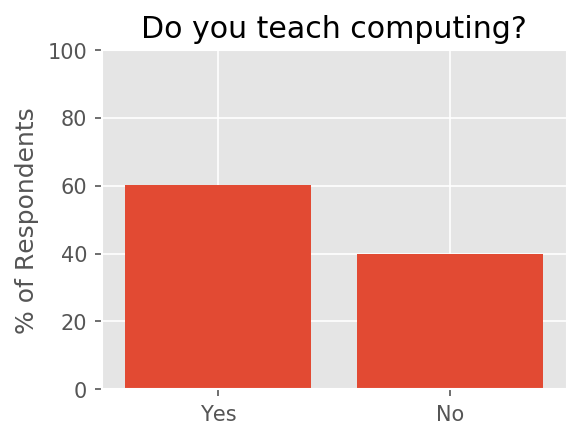

In [16]:
## Apply lambda to count number of yeses
isY = lambda x:int(x==1) ## Relabeled yes as 1 and no as 0
countComputing = lambda row: isY(row.Q1)

numberTeachingComp = df.apply(countComputing,axis=1).sum()
numberRespondents = df.shape[0]
print('Number of total respondents: ', numberRespondents)
print('Number of those teaching computing: ', numberTeachingComp)

teachComp = numberTeachingComp/numberRespondents*100

plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
plt.bar([0,1],[teachComp,100-teachComp])
plt.ylabel('% of Respondents')
plt.xticks([0,1],['Yes','No'])
plt.axis([-.5,1.5,0,100])
plt.title('Do you teach computing?')

### Does this answer look different for different categories of institution?

It appears that 60% of respondents say they teach computing, but when broken down by type of institution do we see something different?

In [12]:
## group by for Q1 with "count()" will give the number of respondents broken down by each of the group by factors
Degree = df.groupby(['Phy.Degfact','Q1']).count()
print(byDegree)

                 id   Q2   Q3   Q4   Q5   Q6  Q7   Q8   Q9  Q10  \
Phy.Degfact Q1                                                    
Associates  0   103  103  103  103  103  103   0  103  103  103   
            1    77   77   77   77   77   77   7   77   77   77   
Bachelors   0   151  151  151  151  151  151   1  151  151  151   
            1   380  380  380  380  380  380  70  380  380  380   
Masters     0    36   36   36   36   36   36   0   36   36   36   
            1    63   63   63   63   63   63  11   63   63   63   
Phd         0   205  205  205  205  205  205   1  205  205  205   
            1   231  231  231  231  231  231  31  231  231  231   

                    ...        Q178  Q179  Q180  NAME  CITY  STABBR  \
Phy.Degfact Q1      ...                                               
Associates  0       ...         103     5    23   103   103     103   
            1       ...          77     1    13    77    77      77   
Bachelors   0       ...         151     4    

Number of total respondents for  Associates :  103
Number of those teaching computing in  Associates :  180
Number of total respondents for  Bachelors :  151
Number of those teaching computing in  Bachelors :  531
Number of total respondents for  Masters :  36
Number of those teaching computing in  Masters :  99
Number of total respondents for  Doctoral :  205
Number of those teaching computing in  Doctoral :  436


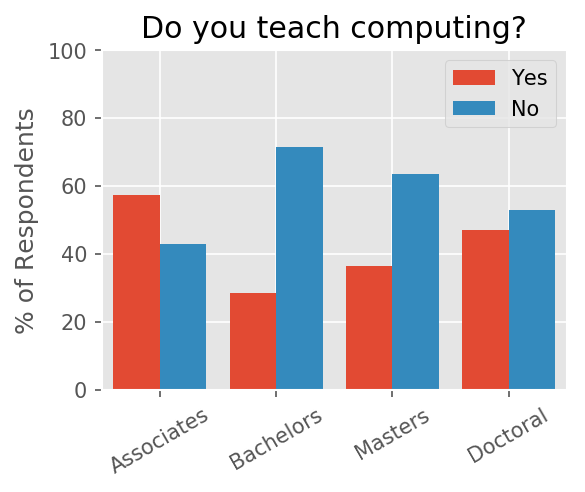

In [33]:
institutionType = ['Associates','Bachelors','Masters','Doctoral']
teachCompByDegree = []
notTeachCompByDegree = []

## Find the fraction of each respondents by type of institution
k=0
for i in range(0,8,2):

    numberTeachingComputing = byDegree['id'][i]
    totalRespondents = byDegree['id'][i]+byDegree['id'][i+1]
    
    fractionTeachingComputing = numberTeachingComputing/totalRespondents*100
    fractionNotTeachingComputing = 100 - fractionTeachingComputing
    
    teachCompByDegree.append(fractionTeachingComputing)
    notTeachCompByDegree.append(fractionNotTeachingComputing)
    
    print('Number of total respondents for ', institutionType[k], ': ', numberTeachingComputing)
    print('Number of those teaching computing in ', institutionType[k], ': ', totalRespondents)
    
    k=k+1

plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')\


plt.bar(np.arange(0.1,8,2),teachCompByDegree)
plt.bar(np.arange(0.9,8,2),notTeachCompByDegree)
plt.ylabel('% of Respondents')
plt.xticks(np.arange(0.5,8,2),institutionType,rotation=30)
plt.axis([-.5,7.5,0,100])
plt.title('Do you teach computing?')
plt.legend(['Yes','No'])

## Are we overweighting multiple responses from the same institution?

I'm concerned because there can be multiple responses from the same school that we might really be overcounting in the departmental sense. So really we want some measure of that. One way to do so is to check if at least one person at a given school says they teach computing.

In [68]:
bySchool = df.groupby(['NAME','Q1']).count()

Number of Unique Schools:  504
Number of Schools with at least one computational teacher:  257


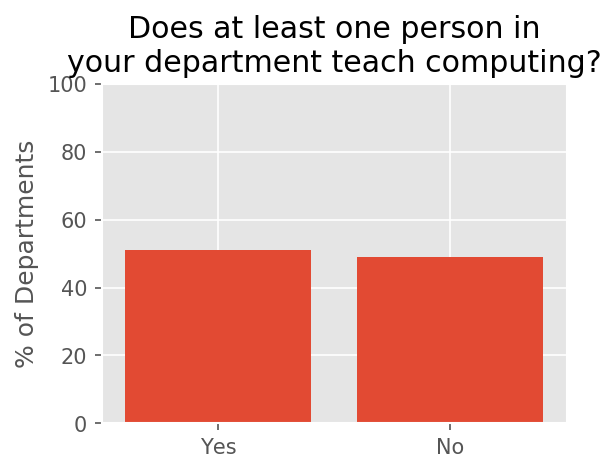

In [69]:
countsBySchool = bySchool['id'];
numberOfSchoolsWithOneTeacher = countsBySchool[countsBySchool > 1].shape[0]
numberOfUniqueSchools = countsBySchool.shape[0]

print('Number of Unique Schools: ', numberOfUniqueSchools)
print('Number of Schools with at least one computational teacher: ', numberOfSchoolsWithOneTeacher)

atLeastOne = numberOfSchoolsWithOneTeacher/numberOfUniqueSchools*100

plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
plt.bar([0,1],[atLeastOne,100-atLeastOne])
plt.ylabel('% of Departments')
plt.xticks([0,1],['Yes','No'])
plt.axis([-.5,1.5,0,100])
plt.title('Does at least one person in\nyour department teach computing?')

## Does this look different for different kinds of schools?

I think there's a problem with how the counting is being done here. Need to unpack further.

In [67]:
numberOfFacultyGrouped=df.groupby(['Phy.Degfact','NAME']).Q1.sum()
numberOfRespondentsGrouped=df.groupby(['Phy.Degfact','NAME']).Q1.size()
fractionOfFacultyGrouped = numberOfFacultyGrouped/numberOfRespondentsGrouped
fractionOfFacultyGrouped = fractionOfFacultyGrouped.reset_index()

In [124]:
iType = ['Associates','Bachelors','Masters','Phd']

numberWithAtLeastOneTeacher = []
numberUniqueSchools =[]
percentWithOneTeacher = []
percentWithOutOneTeacher = []

for i in iType:
    
    nUniqueSchools = fractionOfFacultyGrouped.loc[fractionOfFacultyGrouped['Phy.Degfact'] == i].Q1.size
    trueFalseCounts = fractionOfFacultyGrouped.loc[fractionOfFacultyGrouped['Phy.Degfact'] == i].Q1>0
    nWithAtLeastOneTeacher = trueFalseCounts.value_counts()[True]
    
    numberUniqueSchools.append(nUniqueSchools)
    numberWithAtLeastOneTeacher.append(nWithAtLeastOneTeacher)
    
    print('Number of ', i,' schools with at least one computing teacher: ', nWithAtLeastOneTeacher)
    print('Number of unique ', i,' schools: ', nUniqueSchools)
    
    pWithOneTeacher = nWithAtLeastOneTeacher/nUniqueSchools*100
    pWithOutOneTeacher = 100 - pWithOneTeacher
    
    percentWithOneTeacher.append(pWithOneTeacher)
    percentWithOutOneTeacher.append(pWithOutOneTeacher)

Number of  Associates  schools with at least one computing teacher:  64
Number of unique  Associates  schools:  139
Number of  Bachelors  schools with at least one computing teacher:  137
Number of unique  Bachelors  schools:  153
Number of  Masters  schools with at least one computing teacher:  18
Number of unique  Masters  schools:  18
Number of  Phd  schools with at least one computing teacher:  44
Number of unique  Phd  schools:  47


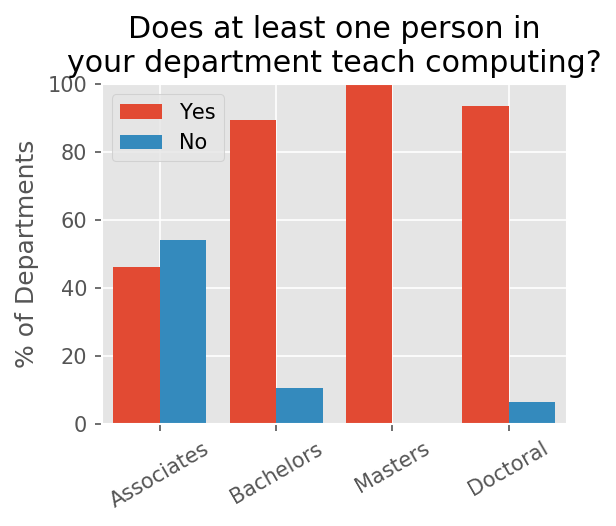

In [130]:
plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')

plt.bar(np.arange(0.1,8,2),percentWithOneTeacher)
plt.bar(np.arange(0.9,8,2),percentWithOutOneTeacher)

plt.ylabel('% of Departments')
plt.xticks(np.arange(0.5,8,2),['Associates','Bachelors','Masters','Doctoral'],rotation=30)
plt.axis([-.5,7.5,0,100])
plt.title('Does at least one person in\nyour department teach computing?')
plt.legend(['Yes','No'])